In [27]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import preprocessing

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
# warnings.filterwarnings('ignore')

In [6]:
import os
general_path = '../input/gtzan-dataset-music-genre-classification/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['disco', 'metal', 'reggae', 'blues', 'rock', 'classical', 'jazz', 'hiphop', 'country', 'pop']


In [10]:
os.listdir(f'{general_path}/genres_original/blues/')[0]

'blues.00039.wav'

In [12]:
audio_path = f'{general_path}/genres_original/blues/blues.00039.wav'
sr = 44100

y, sr = librosa.load(audio_path, sr=sr)
type(y), type(sr)

(numpy.ndarray, int)

In [13]:
ipd.Audio(audio_path)

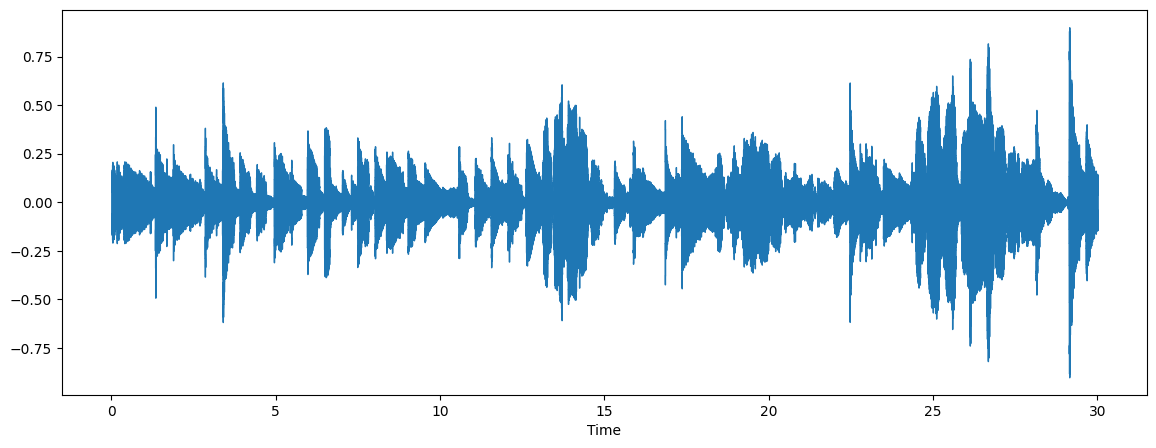

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

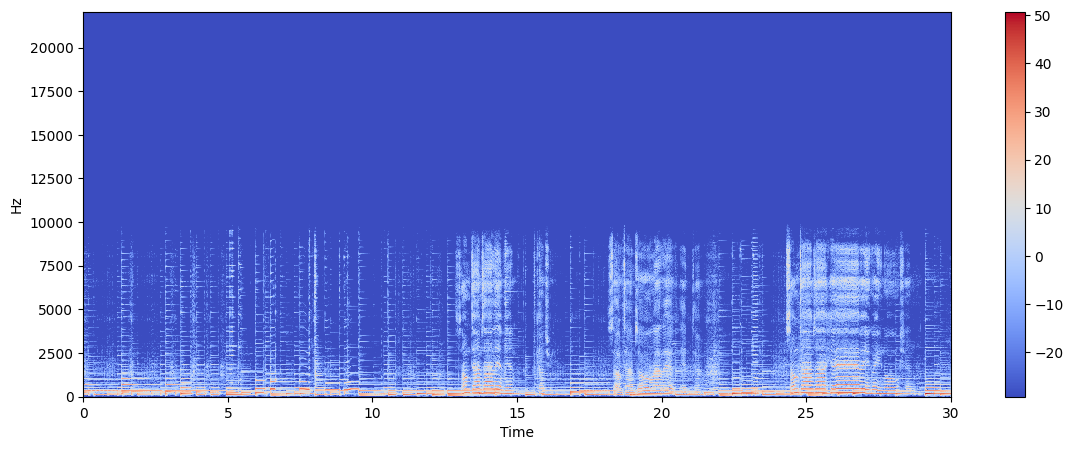

In [16]:
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

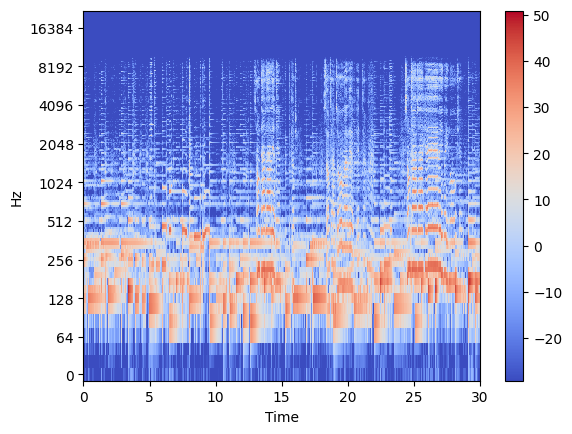

In [17]:
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [18]:
# writing audio
# librosa.output.write_wav('example.wav', x, sr)

## Zero-Crossing Rate

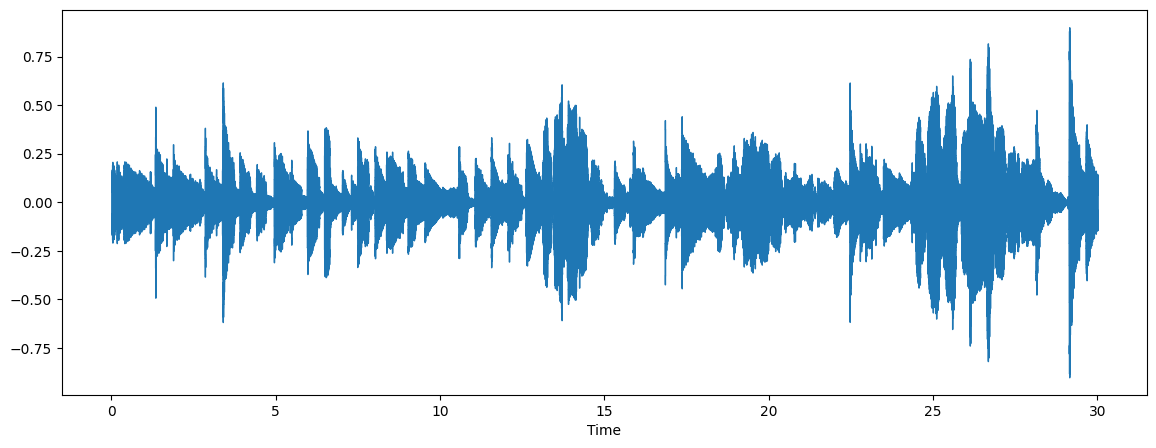

In [19]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

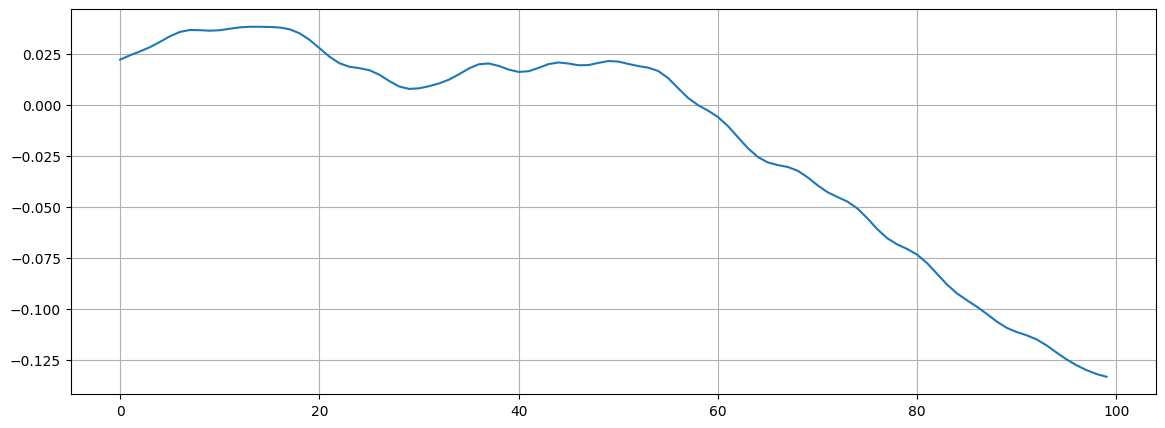

In [20]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()

In [21]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
sum(zero_crossings)

1

## Spectral Centroid

In [32]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_centroids.shape

(2586,)

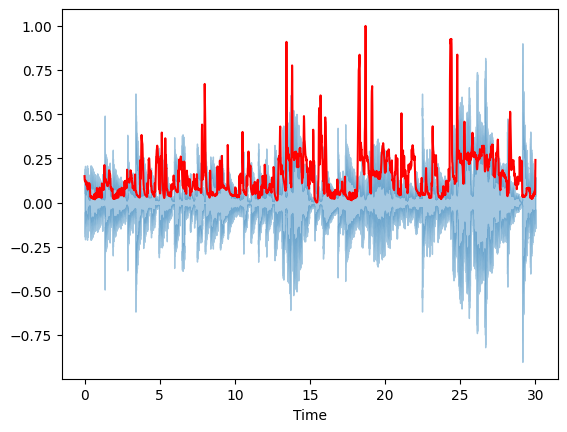

In [36]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=sr)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Spectral Rolloff

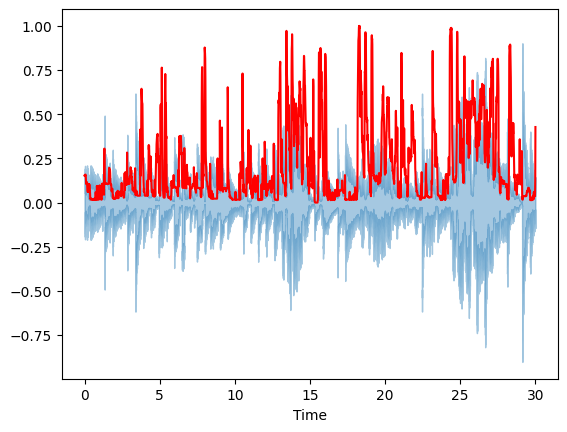

In [37]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Mel-Frequency Cepstral Coefficients

In [39]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)
mfccs.shape

(20, 2586)

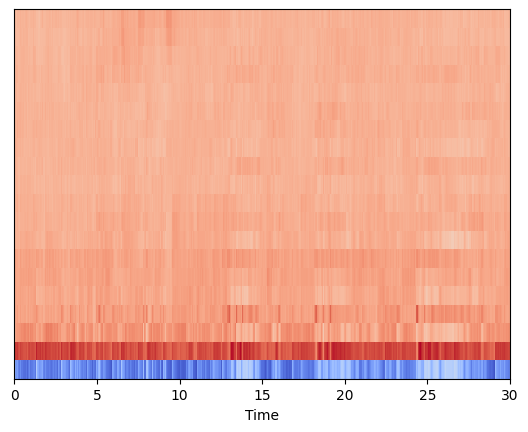

In [40]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 1.1801074e-08  5.9005369e-09  0.0000000e+00 -1.1801074e-08
 -5.9005369e-09  5.9005369e-09  0.0000000e+00  5.9005369e-09
  0.0000000e+00 -8.8508054e-09  7.3756716e-09  0.0000000e+00
  0.0000000e+00  1.1801074e-08  0.0000000e+00  1.1801074e-08
  0.0000000e+00 -1.4751342e-09  5.9005369e-09 -1.1801074e-08]
[1.        1.        1.0000001 1.        1.        0.9999999 1.0000001
 1.0000001 1.        1.        1.        1.0000001 1.        1.
 1.        1.        0.9999999 1.        0.9999999 1.0000001]


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


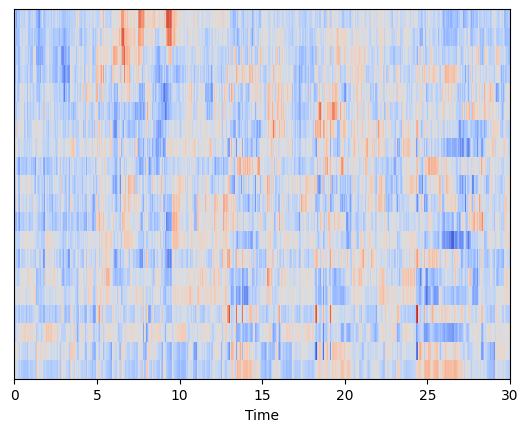

In [41]:
mfccs = preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

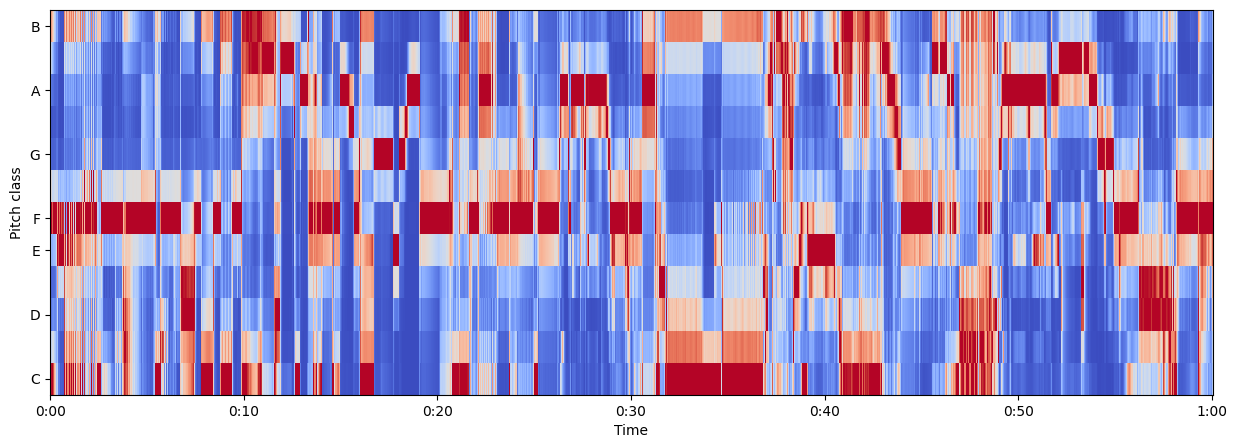

In [42]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')